In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('carprices.csv')

In [3]:
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [6]:
df.rename(columns={'Sell Price($)':'Sell_Price','Age(yrs)':'Age'},inplace=True)
df.head()

,Car Model,Mileage,Sell_Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


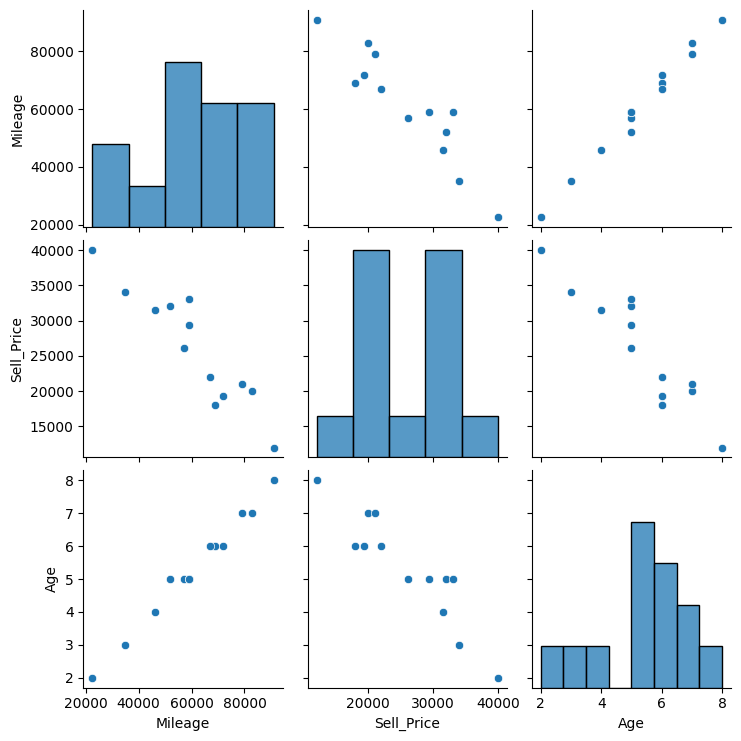

In [10]:
sns.pairplot(data=df)

since there is linear relation of sell_price with age and mileage linear regression model will be suitable 

In [11]:
df['Car Model'].value_counts()

Car Model
BMW X5                   5
Audi A5                  4
Mercedez Benz C class    4
Name: count, dtype: int64

In [23]:
Car_Model_dummy=pd.get_dummies(df['Car Model'],drop_first=1,dtype=int)

,BMW X5,Mercedez Benz C class
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,1


In [28]:
merged = pd.concat([df,Car_Model_dummy],axis=1)
merged

,Car Model,Mileage,Sell_Price,Age,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,1,0
1,BMW X5,35000,34000,3,1,0
2,BMW X5,57000,26100,5,1,0
3,BMW X5,22500,40000,2,1,0
4,BMW X5,46000,31500,4,1,0
5,Audi A5,59000,29400,5,0,0
6,Audi A5,52000,32000,5,0,0
7,Audi A5,72000,19300,6,0,0
8,Audi A5,91000,12000,8,0,0
9,Mercedez Benz C class,67000,22000,6,0,1


In [32]:
merged.drop(labels='Car Model',axis=1,inplace=True)

In [42]:
X=merged.drop(labels='Sell_Price',axis=1)
X

,Mileage,Age,BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [39]:
y=merged.Sell_Price

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [45]:
model.predict([[45000,4,0,1]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [44]:
model.score(X,y)

0.9417050937281082

In [46]:
model.predict([[86000, 7, 1, 0]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [47]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(model, f)